<h1>Predictive Analysis with Python</h1>

__reference:__ https://www.kaggle.com/code/kunalaldar/diabetes-prediction-smote

<h3>Installing Python and Essential Libraries</h3>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Loading and Exploring the Data</h3>

In [2]:
# # read from Google Drive
# from google.colab import drive 
# drive.mount('/content/drive', force_remount=True)
# path = 'drive/My Drive/Developments/'
# !ls 'drive/My Drive/Developments/'
# df=pd.read_csv(path + 'diabetes_prediction_dataset.csv')
# display(df.head(5))

# # read from github.com
# url_file = "https://raw.githubusercontent.com/tribasuki74/predictive_anaysis/main/dataset/diabetes_prediction_dataset.csv"
# df = pd.read_csv(url_file)

# read from local drive
url_file = "dataset/diabetes_prediction_dataset.csv"
df = pd.read_csv(url_file)

display(df.head(5))
print(df.shape)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


(100000, 9)




<h3>Understanding Data</h3>


diabetes
0    91500
1     8500
Name: count, dtype: int64


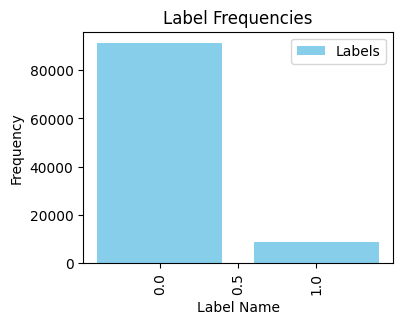

In [3]:
label_names = df['diabetes'].unique()
label_names.sort()

label_counts = df['diabetes'].value_counts().sort_index()
print(label_counts)

plt.figure(figsize=(4, 3))
plt.bar(label_names[label_counts.index], label_counts.values, color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Label Name')
plt.ylabel('Frequency')
plt.title('Label Frequencies')
plt.legend(['Labels'])
plt.show()


<h4>Imbalanced Data</h4>
<h3We might need to consider sampling techniques, although we will first check model performance without sampling.

In [4]:
df['smoking_history'].value_counts()


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

<h4>smoking_history column has No Info category which is can be considered as NaN value</h4?


In [5]:
df['smoking_history']=df['smoking_history'].replace('No Info', np.nan)


In [6]:
df.isnull().sum()


gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

<h4>Imputing missing values of smoking history</h4>


In [7]:
def SmokingHistoryImpute(data,column):
     # Create a boolean mask for missing values in the column
    mask = data[column].isnull()
    
    # Count the number of missing values
    num_missing = mask.sum()
    
    # If there are missing values, sample non-null values from the column
    if num_missing > 0:
        # Sample values from non-null entries in the column
        random_sample = data[column].dropna().sample(num_missing, replace=True)
        
        # Assign these random values to the missing values in the column
        data.loc[mask, column] = random_sample.values
        

In [8]:
SmokingHistoryImpute(df,'smoking_history')

df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<h3>Data Transformation</h3>


In [9]:
# convert to integer/float
df.replace({'gender': {'Female': 0, 'Male': 1, 'Other': 2}}, inplace=True)
df.replace({'smoking_history': {'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4}}, inplace=True)

for column in df.columns:
    unique = df[column].unique()
    unique.sort
    print(f"{column}: {unique}")
    

gender: [0 1 2]
age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension: [0 1]
heart_disease: [1 0]
smoking_history: [0 2 1 3 4]
bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes: [0 1]


/var/folders/y7/vnb4sg4j405c69m5qs8wskcw0000gn/T/ipykernel_3975/3293778842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': {'Female': 0, 'Male': 1, 'Other': 2}}, inplace=True)
/var/folders/y7/vnb4sg4j405c69m5qs8wskcw0000gn/T/ipykernel_3975/3293778842.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoking_history': {'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4}}, inplace=True)


In [10]:
X = df.drop(columns=['diabetes'])
y = df.iloc[:,-1]

print(X.columns)
print(X.shape)
print(y.shape)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
(100000, 8)
(100000,)


In [11]:
# using standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[-8.41046744e-01  1.69270354e+00 -2.84439447e-01 ... -3.21055792e-01
   1.00170572e+00  4.77042159e-02]
 [-8.41046744e-01  5.38006427e-01 -2.84439447e-01 ... -1.15583678e-04
   1.00170572e+00 -1.42620999e+00]
 [ 1.18723364e+00 -6.16690686e-01 -2.84439447e-01 ... -1.15583678e-04
   1.61108022e-01  4.89878478e-01]
 ...
 [ 1.18723364e+00  1.07094356e+00 -2.84439447e-01 ...  7.67292549e-02
   1.61108022e-01  4.16182767e-01]
 [-8.41046744e-01 -7.94336396e-01 -2.84439447e-01 ...  1.22036126e+00
  -1.42668764e+00 -9.34905254e-01]
 [-8.41046744e-01  6.71240710e-01 -2.84439447e-01 ... -7.36921977e-01
   1.00170572e+00 -1.18055762e+00]]


<h3>Building a Predictive Model</h3>


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report


<h4>Split data</h4>

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(80000, 8)
(20000, 8)
(80000,)
(20000,)


<h4>Choosing the Right Model</h4>

In [16]:
rf = RandomForestClassifier()


<h4>Model Training and Evaluation</h4>

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [20]:
f1_score(y_test,y_pred)


np.float64(0.7958079783637593)

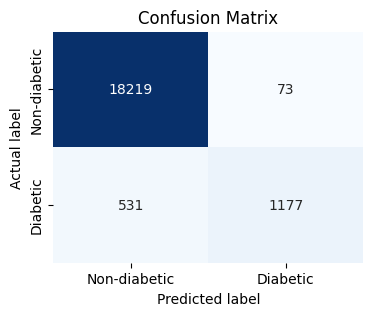

In [32]:
label = ['Non-diabetic', 'Diabetic']
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4, 3))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label,
            yticklabels=label)

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Class 0 (Non-diabetic):
- __Precision (0.97):__ Out of all the instances predicted as non-diabetic, 97% were correctly identified as non-diabetic.
- __Recall (1.00):__ The model successfully identified all actual non-diabetic cases, meaning it didn’t miss any non-diabetic instances.
- __F1-Score (0.98):__ The F1-score, which balances precision and recall, is very high, indicating excellent performance for predicting non-diabetic cases.

# Class 1 (Diabetic):
- __Precision (0.94):__ Out of all the instances predicted as diabetic, 94% were correctly classified as diabetic.
- __Recall (0.69):__ The model only captured 69% of the actual diabetic cases, meaning 31% of true diabetic cases were missed by the model.
- __F1-Score (0.80):__ This shows the model's ability to handle diabetic cases, though the lower recall pulls down the F1-score.

# Conclusion:
We can clearly see model is biased towards majority class(i.e Non Diabetic) so we have used any one of the sampling technique to overcome imbalance in dataset.
Although, it can deviate in some degree from real world situation but it can acceptable.

# Handling Imbalance using SMOTE technique

- __Combining Oversampling and Undersampling:__ SMOTETomek combines SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links. SMOTE oversamples the minority class by creating synthetic samples, while Tomek links are used to undersample by removing overlapping or noisy examples from the majority class.

- __Reducing Class Overlap:__ SMOTETomek helps to reduce class overlap by removing Tomek links, which are pairs of instances (one from the majority class and one from the minority class) that are closest to each other and likely to be misclassified.

In [22]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek(random_state=42)


In [23]:
X_resample,y_resample=sm.fit_resample(X_scaled,y)
print(X_resample.shape)
print(y_resample.shape)


(181664, 8)
(181664,)


diabetes
0    90832
1    90832
Name: count, dtype: int64


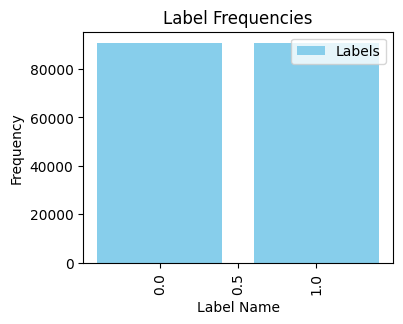

In [24]:
label_counts = y_resample.value_counts()
print(label_counts)

plt.figure(figsize=(4, 3))
plt.bar(label_names[label_counts.index], label_counts.values, color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Label Name')
plt.ylabel('Frequency')
plt.title('Label Frequencies')
plt.legend(['Labels'])
plt.show()


In [25]:
X_train_rs,X_test_rs,y_train_rs,y_test_rs = train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

print(X_train_rs.shape)
print(X_test_rs.shape)
print(y_train_rs.shape)
print(y_test_rs.shape)


(145331, 8)
(36333, 8)
(145331,)
(36333,)


In [26]:
clf = RandomForestClassifier()


In [27]:
clf.fit(X_train_rs,y_train_rs)


RandomForestClassifier()

In [28]:
y_pred_rs = clf.predict(X_test_rs)


In [29]:
print(classification_report(y_test_rs,y_pred_rs))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18102
           1       0.98      0.98      0.98     18231

    accuracy                           0.98     36333
   macro avg       0.98      0.98      0.98     36333
weighted avg       0.98      0.98      0.98     36333



In [30]:
f1_score(y_test_rs,y_pred_rs)


np.float64(0.9794934976043805)

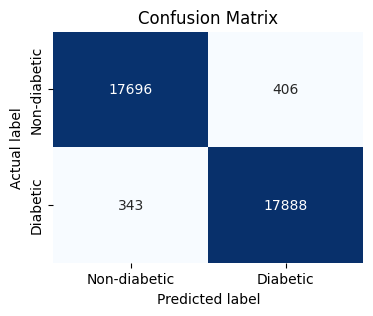

In [33]:
cm = confusion_matrix(y_test_rs,y_pred_rs)
plt.figure(figsize=(4, 3))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label,
            yticklabels=label)

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


- __Conclusion:__
  
We can see significant improvement in f1_score after sampling data(from 0.79 to 0.98).

# Model Optimization and Tuning

## Hyperparameter Tuning
### Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV
grid_space={'max_depth':[3,5,10,None], 
            'max_features':[1,3,5,7],
            'n_estimators':[10,100,200],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[1,2,3]
           }

We will now try adjusting the following set of hyperparameters of this model:

- __“Max_depth”:__ This hyperparameter represents the maximum level of each tree in the random forest model. A deeper tree performs well and captures a lot of information about the training data, but it will not generalize well enough to test data. By default, this value is set to “None” in the Scikit-Learn library, which means that the trees are left to expand completely.
  
- __“Max_features”:__ The maximum number of features that the random forest model is allowed to try at each split. By default in Scikit-Learn, this value is set to the square root of the total number of variables in the dataset.

- __“N_estimators”:__ The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.

- __“Min_samples_leaf”:__ The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.

- __“Min_samples_split”:__ The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.

We will now create a dictionary of multiple possible values for all the above hyperparameters. This is also called the hyperparameter space and will be searched through to find the best combination of arguments:

In [35]:

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/an

In [36]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))


Best hyperparameters are: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best score is: 0.9720799940944751


### Defining the Hyperparameter Space

In [39]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }


### Running Random Search

In [40]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X,y)


In [ ]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))


## Cross validation for sampled data using cross val

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_resample, y_resample, cv=5, scoring='f1',verbose=1,n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished


array([0.95505873, 0.98492545, 0.98540285, 0.9843409 , 0.98463889])

__Cross val conclusion:__

Cross Val scores for __5 folds__ can confirm that our __model is not overfitting__. Although 1 out of 5 folds underperformed, this is acceptable.

### ROC-AUC plot for minority class comparison

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are powerful tools for evaluating the performance of a classification model, especially when dealing with imbalanced datasets where the minority class is of particular interest. Below, the sample code to show the process of generating a ROC-AUC plot specifically for comparing the model's ability to predict a minority class.


In [44]:
rf.fit(X_train,y_train)

y_proba = rf.predict_proba(X_test)[:,1]
y_proba_rs = clf.predict_proba(X_test_rs)[:,1]


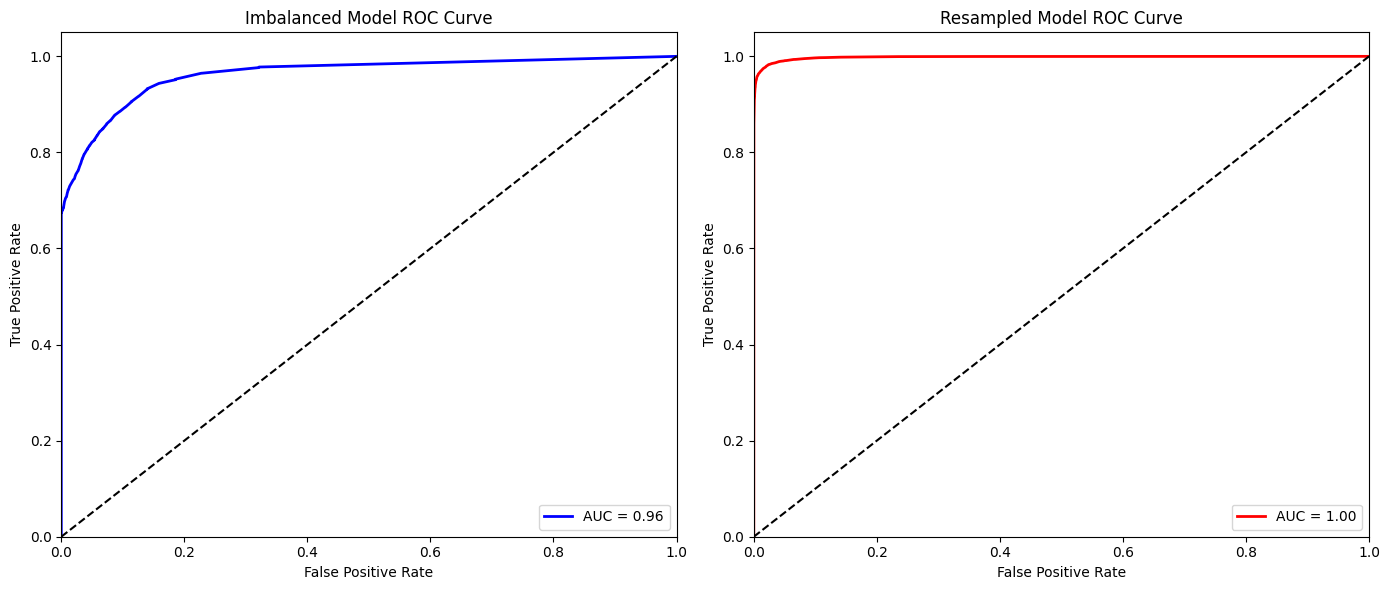

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute ROC curve and ROC area for both models
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

fpr_rs, tpr_rs, _ = roc_curve(y_test_rs, y_proba_rs)
roc_auc_rs = roc_auc_score(y_test_rs, y_proba_rs)

# Create subplots: two ROC curves side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC curve for the imbalanced model
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='black', linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Imbalanced Model ROC Curve')
ax[0].legend(loc="lower right")

# Plot ROC curve for the resampled model
ax[1].plot(fpr_rs, tpr_rs, color='red', lw=2, label=f'AUC = {roc_auc_rs:.2f}')
ax[1].plot([0, 1], [0, 1], color='black', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Resampled Model ROC Curve')
ax[1].legend(loc="lower right")

# Adjust spacing between plots
plt.tight_layout()

# Show plots
plt.show()


### Precision Recall curve for minority class comparision

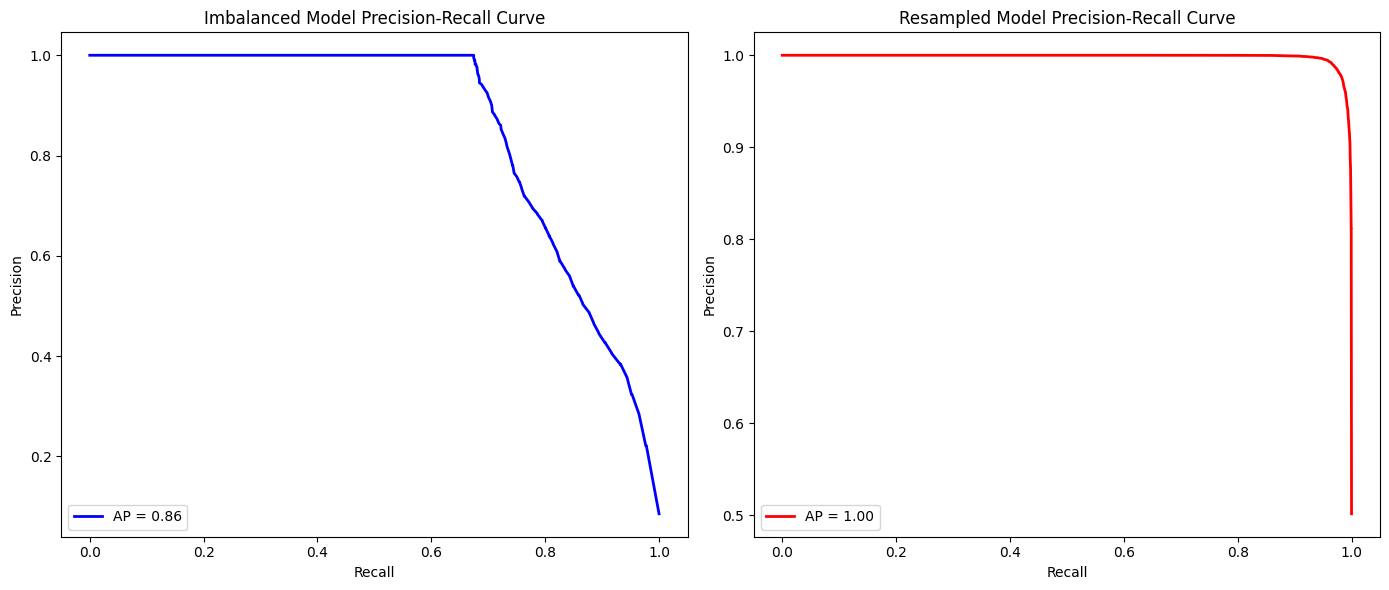

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and average precision score for both models
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

precision_rs, recall_rs, _ = precision_recall_curve(y_test_rs, y_proba_rs)
average_precision_rs = average_precision_score(y_test_rs, y_proba_rs)

# Create subplots: two PR curves side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot PR curve for the imbalanced model
ax[0].plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('Imbalanced Model Precision-Recall Curve')
ax[0].legend(loc="lower left")

# Plot PR curve for the resampled model
ax[1].plot(recall_rs, precision_rs, color='red', lw=2, label=f'AP = {average_precision_rs:.2f}')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Resampled Model Precision-Recall Curve')
ax[1].legend(loc="lower left")

# Adjust spacing between plots
plt.tight_layout()

# Show plots
plt.show()


## Deployment model

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18102
           1       0.98      0.98      0.98     18231

    accuracy                           0.98     36333
   macro avg       0.98      0.98      0.98     36333
weighted avg       0.98      0.98      0.98     36333

f1_score:  0.9794934976043805


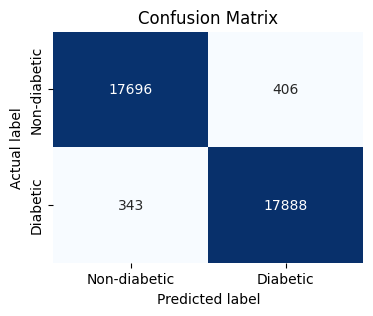

In [53]:
import pickle

# save the model into the pk1 file
pickle.dump(clf , open('random-forest-model.pk1' , 'wb'))

# load the model from the pk1 file
loaded_clf = pickle.load(open('random-forest-model.pk1' , 'rb'))
y_pred_rs = loaded_clf.predict(X_test_rs)
print(classification_report(y_test_rs,y_pred_rs))

print('f1_score: ', f1_score(y_test_rs,y_pred_rs))

cm = confusion_matrix(y_test_rs,y_pred_rs)
plt.figure(figsize=(4, 3))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label,
            yticklabels=label)

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
